In [1]:
import os, sys
print(sys.executable) # works this time
print(sys.version)
print(sys.version_info)
import scanpy as sc
from sklearn.cross_decomposition import CCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix
import numpy as np
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

I:\mutiomics\pythonProject\.venv\Scripts\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)


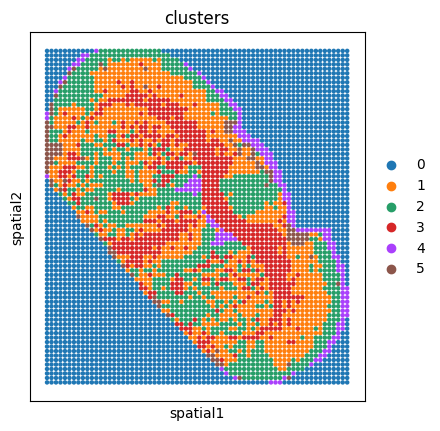

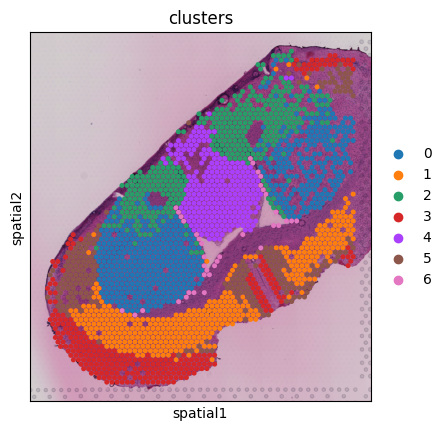

In [2]:
adata1 = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\m3_9AA_VisiumArray.h5ad")
adata2 = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\m3_visium_9AA.h5ad")
sc.pl.spatial(adata1, img_key = "hires", color="clusters", spot_size=1)
sc.pl.spatial(adata2, img_key = "hires", color="clusters", size=1.5)
adata1.obs["leiden"] = adata1.obs["clusters"]
adata2.obs["leiden"] = adata2.obs["clusters"]

In [5]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\m3_visium_9AA_m3_9AA_VisiumArray\\pair_groundtruth.csv')

# Display the first few rows of the DataFrame
print(df.head())

   spatial.CCA.X  spatial.CCA.Y  spatial_ID  spatial_cluster  spatial.CCA.Z  \
0     137.230094     124.255017           0                1             -1   
1      21.568259     146.357159           1                5             -1   
2     121.970208      30.256630           2                2             -1   
3     154.945995     111.431878           3                1             -1   
4      32.318654     102.178616           4                5             -1   

   metabolic.CCA.X  metabolic.CCA.Y  matabolic_ID  matabolic_cluster  \
0       137.837838       125.373134          2068                  3   
1        21.621622       146.268657          2496                  1   
2       121.621622        29.850746           316                  2   
3       154.054054       110.447761          1754                  1   
4        32.432432       101.492537          1616                  1   

   matabolic.CCA.Z  
0                1  
1                1  
2                1  
3       

In [31]:
from scipy.sparse import issparse
adata1.X.shape
adata3=adata1[df["matabolic_ID"].to_numpy()]
adata4 = csr_matrix(adata3.X)
print(np.mean(adata3.X, axis=0))
print(np.mean(adata2.X, axis=0))
adata2_=adata2
adata3_=adata3
sc.pp.scale(adata2_, max_value=10)
sc.pp.scale(adata3_, max_value=10)
print(np.mean(adata2_.X, axis=0))
print(np.mean(adata3_.X, axis=0))

[9.05870889 8.86492759 3.75333824 ... 0.80026473 0.50220005 0.82858457]
[ 3.5225807e-07  2.6690532e-07  1.8190157e-08 ... -2.2287304e-07
 -6.6795428e-03 -7.6009350e-08]
[ 2.2379933e-07  2.6690532e-07  1.8190157e-08 ... -1.7108144e-07
 -4.2459262e-03 -6.3108430e-08]
[ 2.89583172e-15  2.95409343e-16 -5.68014104e-16 ...  2.70004239e-16
  1.15398182e-16  3.89678280e-16]


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [33]:
df1 = pd.DataFrame(adata3_.X)
df2 = pd.DataFrame(adata2_.X)
df2.values

array([[-0.15135242, -0.23377317, -0.17166652, ..., -0.32521558,
        -0.10129602,  0.5789462 ],
       [-0.15135242, -0.23377317, -0.17166652, ...,  1.645394  ,
        -0.10129602,  0.00482582],
       [-0.15135242, -0.23377317, -0.17166652, ..., -0.32521558,
        -0.10129602,  0.9192395 ],
       ...,
       [-0.15135242, -0.23377317, -0.17166652, ..., -0.32521558,
        -0.10129602,  0.0462526 ],
       [-0.15135242, -0.23377317, -0.17166652, ..., -0.32521558,
        -0.10129602,  0.87879604],
       [-0.15135242, -0.23377317, -0.17166652, ..., -0.32521558,
        -0.10129602,  0.34673217]], dtype=float32)

In [35]:
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.stats import pearsonr
import numpy as np

# 示例稀疏矩阵数据

# 创建 DataFrame
df1 = pd.DataFrame(adata3_.X)
df2 = pd.DataFrame(adata2_.X)

combined_matrix = np.hstack([df1, df2])

# 计算相关性矩阵
correlation_matrix = np.corrcoef(combined_matrix, rowvar=False)

In [36]:
combined_matrix.shape

(2220, 19288)

In [37]:
# Flatten the correlation matrix and keep track of the row and column indices, excluding NaNs
correlation_matrix2 = pd.DataFrame(correlation_matrix)
correlation_matrix2 = correlation_matrix2.iloc[:len(adata3.var_names), -len(adata2.var_names):]
flattened = correlation_matrix2.values.flatten()
non_nan_indices = ~np.isnan(flattened)
flattened_non_nan = flattened[non_nan_indices]
original_indices = np.dstack(np.unravel_index(np.where(non_nan_indices)[0], correlation_matrix2.shape))[0]

# Sort the non-NaN flattened array to find the top 20 highest values
sorted_indices = np.argsort(flattened_non_nan)[::-1]
top_n = 30
top_indices = original_indices[sorted_indices[:top_n]]

# Retrieve the corresponding row and column indices
top_rows = top_indices[:, 0]
top_cols = top_indices[:, 1]

# Get the top 20 highest values
top_values = flattened_non_nan[sorted_indices[:top_n]]

# Convert to lists if needed
top_rows = list(top_rows)
top_cols = list(top_cols)
top_values = list(top_values)

# Display results
print("Top 20 highest correlation values (excluding NaNs):")
for i in range(len(top_values)):
    print(f"Value: {top_values[i]}, Row: {top_rows[i]}, Column: {top_cols[i]}")

# Optionally, convert to a DataFrame for easier viewing
top_correlations_df = pd.DataFrame({
    'Value': top_values,
    'Row': top_rows,
    'Column': top_cols
})

print("\nTop 20 highest correlation values in DataFrame format:")
print(top_correlations_df)

Top 20 highest correlation values (excluding NaNs):
Value: 0.19815120564283042, Row: 2476, Column: 19
Value: 0.1964749732372869, Row: 2476, Column: 8500
Value: 0.19387231534181806, Row: 2014, Column: 19
Value: 0.1936678173434229, Row: 1232, Column: 19
Value: 0.19127300041187734, Row: 936, Column: 19
Value: 0.1891325435511999, Row: 1466, Column: 19
Value: 0.18862762444258244, Row: 510, Column: 10109
Value: 0.18831122744918163, Row: 1500, Column: 19
Value: 0.18637564165660042, Row: 1716, Column: 8500
Value: 0.18501503150543677, Row: 3083, Column: 3192
Value: 0.1844001899546102, Row: 1500, Column: 8500
Value: 0.18420951984243053, Row: 1716, Column: 19
Value: 0.1838362724054835, Row: 798, Column: 19
Value: 0.18232545558626848, Row: 936, Column: 8500
Value: 0.18215570628188646, Row: 2458, Column: 8500
Value: 0.181907128925707, Row: 2568, Column: 19
Value: 0.181643208680887, Row: 1050, Column: 19
Value: 0.1816126734867663, Row: 1244, Column: 19
Value: 0.18107150628352178, Row: 1487, Column: 

In [47]:
indices1 = top_correlations_df.iloc[:, 1]
indices2 = top_correlations_df.iloc[:, 2]

# Create a new DataFrame from these indices
indices_df = pd.DataFrame({
    'Index1': indices1,
    'Index2': indices2
})

# Display the new DataFrame
print(indices_df)
var_names1 = adata3.var_names[indices1]
var_names2 = adata2.var_names[indices2]

# Create a new DataFrame from these indices and variable names
indices_df = pd.DataFrame({
    'Index1': indices1,
    'VarName1': var_names1,
    'Index2': indices2,
    'VarName2': var_names2
})

# Display the new DataFrame
print(indices_df)

    Index1  Index2
0     2476      19
1     2476    8500
2     2014      19
3     1232      19
4      936      19
5     1466      19
6      510   10109
7     1500      19
8     1716    8500
9     3083    3192
10    1500    8500
11    1716      19
12     798      19
13     936    8500
14    2458    8500
15    2568      19
16    1050      19
17    1244      19
18    1487      19
19    1981    8500
20      94    8500
21    2476    6106
22    1702      19
23    1716    2263
24     510    6106
25    1716    6106
26    1466    6106
27    1716   11232
28     883      19
29     936    6106
    Index1            VarName1  Index2 VarName2
0     2476          537.574345      19      Vxn
1     2476          537.574345    8500      Cck
2     2014           432.63932      19      Vxn
3     1232          309.752475      19      Vxn
4      936           272.79503      19      Vxn
5     1466          340.736175      19      Vxn
6      510           212.83946   10109     Epop
7     1500           344.73